In [1]:
# import dependencies

In [324]:
from adbrew_core.settings import db
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sc
import numpy as np

In [325]:
db.report_records.find_one()

{'_id': ObjectId('5ffdb954b953717abc711679'),
 'adGroupId': 191071097198671,
 'campaignId': 8947921720820,
 'keywordId': 162675238320678,
 'profile_id': '1480904248596993',
 'query': 'ewell ring light and tripod',
 'str_dt': '20210111',
 'account_id': '5ffdb895b08512986422b08c',
 'attributedSales14d': 0,
 'attributedUnitsOrdered14d': 0,
 'clicks': 1,
 'cost': 9.41,
 'dt': datetime.datetime(2021, 1, 11, 0, 0),
 'impressions': 11,
 'record_type': 'keywords',
 'segment': 'query',
 'campaign_type': 'sp'}

In [326]:
accounts = {}
unique_adgs = []

idx = 0
total_accounts = 300

for account in db.account_details.find({"active":True, "fetch_data":True}):
    record = db.report_records.aggregate([
        {
            "$match": {
                "account_id": str(account["_id"]),
                "dt": {
                    "$gte": datetime.datetime.now() - datetime.timedelta(days=360),
                    "$lte": datetime.datetime.now()
                },
                "record_type":"accounts",
                "segment":None,
                "campaign_type":"sp"
            }
        },
        {
            "$group": {
                "_id": {
                    "accountId":"$account_id",
                }
            }
        }
    ], allowDiskUse=True)
    record = pd.DataFrame(record)
    if record.empty:
        continue
    record["accountId"] = record.apply(lambda x:x["_id"]["accountId"], axis=1)
    record.drop(columns=["_id"], inplace=True)
    if record.empty:
        continue
    unique_adgs += [record]
    print(idx, end='\r', flush=True)
    idx+=1
    if idx==total_accounts:
        break
    

In [338]:
unique_accounts = []

In [339]:
for i in range(288):
    a = unique_adgs[i]['accountId'][0]
    unique_accounts.append(a)

In [240]:
'635518b2d091908f5e8e7652' in unique_accounts

True

In [241]:
account_cost = []

In [242]:
account_cost = []
for i in unique_accounts:
    a = db.report_records.find_one({"record_type":"accounts", "account_id":  i,"campaign_type":"sp"})['cost']
    account_cost.append([i,a])

In [243]:
spend_data = pd.DataFrame(data = account_cost,columns =  ["account_id","spend"])

In [244]:
spend_data

,account_id,spend
0,5ffdb895b08512986422b08c,22219.80
1,6013fbaaaadf53eb56518f43,140.08
2,60f927c947e4bd8523649c9d,0.00
3,612e3e3936240d16135f1944,0.00
4,613b4e3416cb8c3ddcb60925,0.00
...,...,...
283,63cb891adab9c845ba47c740,230.87
284,63cb9627dab9c845ba47c741,338.67
285,63ce34e69b66eadd5cfdce2e,28.27
286,63cfc3cf726c7a0b80fdce39,0.00


In [245]:
db.report_records.find_one({"record_type":"accounts", "account_id": "5ffdb895b08512986422b08c","campaign_type":"sp"})

{'_id': ObjectId('63d0ba0d6ee9dbf2febcdcfb'),
 'account_id': '5ffdb895b08512986422b08c',
 'campaign_type': 'sp',
 'dt': datetime.datetime(2023, 1, 25, 0, 0),
 'record_type': 'accounts',
 'segment': None,
 'attributedConversions14d': 77,
 'attributedConversions14dSameSKU': 60,
 'attributedConversions1d': 77,
 'attributedConversions1dSameSKU': 60,
 'attributedConversions30d': 77,
 'attributedConversions30dSameSKU': 60,
 'attributedConversions7d': 77,
 'attributedConversions7dSameSKU': 60,
 'attributedSales14d': 100300.2,
 'attributedSales14dSameSKU': 86061.53,
 'attributedSales1d': 100300.2,
 'attributedSales1dSameSKU': 86061.53,
 'attributedSales30d': 100300.2,
 'attributedSales30dSameSKU': 86061.53,
 'attributedSales7d': 100300.2,
 'attributedSales7dSameSKU': 86061.53,
 'attributedUnitsOrdered14d': 79,
 'attributedUnitsOrdered14dSameSKU': 62,
 'attributedUnitsOrdered1d': 79,
 'attributedUnitsOrdered1dSameSKU': 62,
 'attributedUnitsOrdered30d': 79,
 'attributedUnitsOrdered30dSameSKU': 6

In [246]:
# graph

In [247]:
#!pip install seaborn

In [248]:
import seaborn as sns

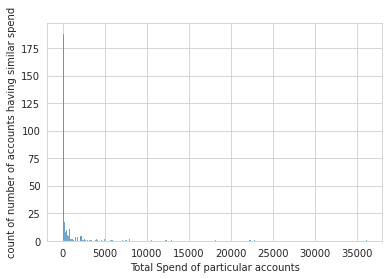

In [249]:
sns.histplot(spend_data['spend'])
plt.xlabel("Total Spend of particular accounts")
plt.ylabel("count of number of accounts having similar spend")
plt.show()

In [250]:
total_spend = spend_data['spend']
total_spend

0      22219.80
1        140.08
2          0.00
3          0.00
4          0.00
         ...   
283      230.87
284      338.67
285       28.27
286        0.00
287        0.00
Name: spend, Length: 288, dtype: float64

In [251]:
import math

In [252]:
## Mean 

In [253]:
Mean=  sum(total_spend)/288

In [254]:
Mean

1025.7490277777779

In [255]:
# Number of account having 0 spending but active

In [256]:
no_of_0_spend_account = spend_data[spend_data['spend']==0].count()[1]
no_of_0_spend_account

117

In [257]:
# min spend across all acount 

In [258]:
# min spend across all acount 
min(total_spend)

0.0

In [259]:
# max spend across all acount 

In [260]:
# max spend across all acount 
max(total_spend)

36143.19

In [261]:
# Account_id having maximum spend
spend_data[spend_data["spend"]==max(total_spend)]['account_id']

105    633444a7d89f609870fcef45
Name: account_id, dtype: object

In [262]:
## Accounts having spend closer to mean

Mean = 1025.7490277777779

greater_than_750 = spend_data[spend_data["spend"]>750]

Between_750_1200 = greater_than_750[greater_than_750["spend"]<1200]
len(Between_750_1200)

16

In [263]:
# Percentage of accounts lying in the above range

percentage =  len(Between_750_1200)*100/288
percentage

5.555555555555555

In [264]:
# Number of accounts having max_spend
no_of_max_spend_account = spend_data[spend_data['spend']==max(total_spend)].count()[1]
no_of_max_spend_account

1

In [265]:
# Median 

In [266]:
sc.median(sorted(total_spend))

5.3149999999999995

In [267]:
spend_data.describe()

,spend
count,288.000000
mean,1025.749028
std,3455.046262
min,0.000000
25%,0.000000
50%,5.315000
75%,439.450000
max,36143.190000


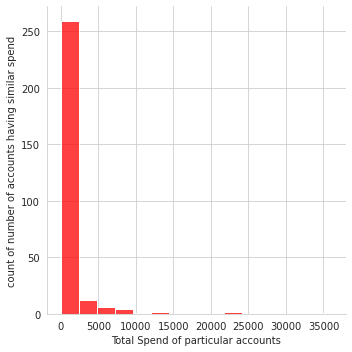

In [268]:
# On x axis - total spend in account is present and on y-axis the count of the 
# number of account that have spend present in that particular range

sns.set_style('whitegrid')
sns.displot(spend_data['spend'], kde = False, color ='red', bins = 15)
plt.xlabel("Total Spend of particular accounts")
plt.ylabel("count of number of accounts having similar spend")
plt.show()

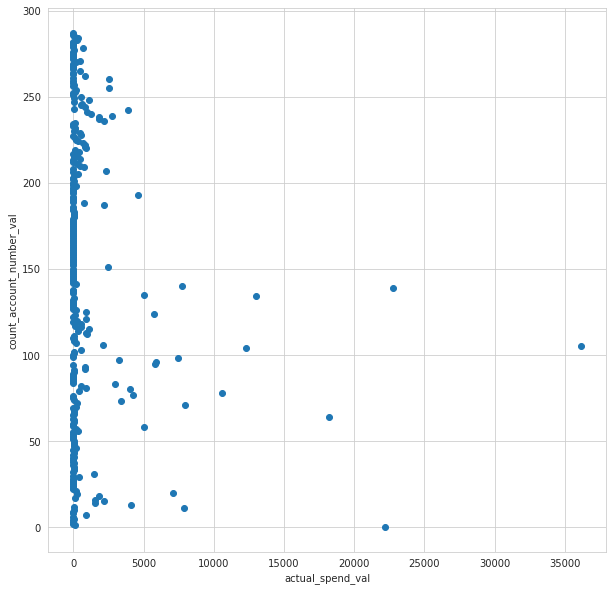

In [269]:
plt.figure(figsize = (10,10))
plt.scatter(x = spend_data['spend'],y = range(0,288))
plt.xlabel('actual_spend_val')
plt.ylabel('count_account_number_val')
plt.show()

In [270]:
#### since standard deviation is coming so high ,so the spend across all accounts is spread out means less reliable 

In [271]:
##  Checking the spending

In [272]:
spend_data

,account_id,spend
0,5ffdb895b08512986422b08c,22219.80
1,6013fbaaaadf53eb56518f43,140.08
2,60f927c947e4bd8523649c9d,0.00
3,612e3e3936240d16135f1944,0.00
4,613b4e3416cb8c3ddcb60925,0.00
...,...,...
283,63cb891adab9c845ba47c740,230.87
284,63cb9627dab9c845ba47c741,338.67
285,63ce34e69b66eadd5cfdce2e,28.27
286,63cfc3cf726c7a0b80fdce39,0.00


In [273]:
spend_data[spend_data['spend']>0].count()[1]

# There are total 171 accounts where the spending is greater than 0

171

In [274]:
spend_data[spend_data['spend']>100].count()[1]

# There are total 108 accounts where the spending is greater than 100

108

In [275]:
spend_data[spend_data['spend']>200].count()[1]

# There are total 90 accounts where the spending is greater than 200

90

In [276]:
spend_data[spend_data['spend']>500].count()[1]

# There are total 69 accounts where the spending is greater than 500

69

In [277]:
spend_data[spend_data['spend']>1000].count()[1]

# There are total 43 accounts where the spending is greater than 1000

43

In [278]:
spend_data[spend_data['spend']>1500].count()[1]

# There are total 39 accounts where the spending is greater than 1500

39

In [279]:
spend_data[spend_data['spend']>2000].count()[1]

# There are total 34 accounts where the spending is greater than 2000

34

In [280]:
spend_data[spend_data['spend']>3000].count()[1]

# There are total 24 accounts where the spending is greater than 3000

24

In [281]:
spend_data[spend_data['spend']>4000].count()[1]

# There are total 21 accounts where the spending is greater than 4000

21

In [282]:
spend_data[spend_data['spend']>5000].count()[1]

# There are total 17 accounts where the spending is greater than 5000

17

In [283]:
spend_data[spend_data['spend']>6000].count()[1]

# There are total 12 accounts where the spending is greater than 6000

12

In [284]:
spend_data[spend_data['spend']>6500].count()[1]

# There are total 12 accounts where the spending is greater than 6500

12

In [285]:
spend_data[spend_data['spend']>7000].count()[1]

# There are total 12 accounts where the spending is greater than 7000

12

In [286]:
spend_data[spend_data['spend']>8500].count()[1]

# There are total 7 accounts where the spending is greater than 8500

7

In [287]:
spend_data[spend_data['spend']>9000].count()[1]

# There are total 7 accounts where the spending is greater than 9000

7

In [288]:
spend_data[spend_data['spend']>15000].count()[1]

# There are total 4 accounts where the spending is greater than 9000

4

### Removing outliers

In [289]:
spend_data_wht_outliers = spend_data[spend_data['spend']<7000]

In [290]:
spend_data_wht_outliers

,account_id,spend
1,6013fbaaaadf53eb56518f43,140.08
2,60f927c947e4bd8523649c9d,0.00
3,612e3e3936240d16135f1944,0.00
4,613b4e3416cb8c3ddcb60925,0.00
5,613b51d1565006d4e2b60924,7.60
...,...,...
283,63cb891adab9c845ba47c740,230.87
284,63cb9627dab9c845ba47c741,338.67
285,63ce34e69b66eadd5cfdce2e,28.27
286,63cfc3cf726c7a0b80fdce39,0.00


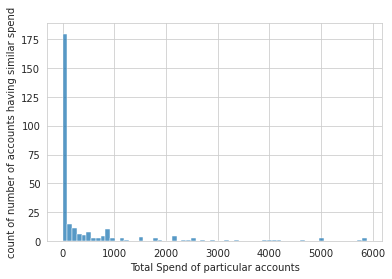

In [291]:
sns.histplot(spend_data_wht_outliers['spend'])
plt.xlabel("Total Spend of particular accounts")
plt.ylabel("count of number of accounts having similar spend")
plt.show()

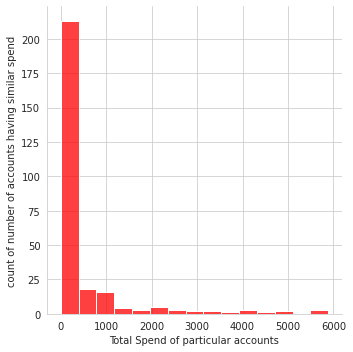

In [292]:
sns.set_style('whitegrid')
sns.displot(spend_data_wht_outliers['spend'], kde = False, color ='red', bins = 15)
plt.xlabel("Total Spend of particular accounts")
plt.ylabel("count of number of accounts having similar spend")
plt.show()

In [293]:
total_spend_wht_out = spend_data_wht_outliers['spend']

In [294]:
Mean_wht_outliers =  sum(total_spend_wht_out)/288

In [295]:
Mean_wht_outliers

424.41475694444455

In [296]:
# Number of account having 0 spending but active
no_of_0_spend_account_wht_out = spend_data_wht_outliers[spend_data_wht_outliers['spend']==0].count()[1]
no_of_0_spend_account_wht_out

117

In [297]:
# max spend across all acount 
max(total_spend_wht_out)

5885.08

In [298]:
# Account_name having maximum spend
spend_data_wht_outliers[spend_data_wht_outliers["spend"]==max(total_spend_wht_out)]['account_id']

96    6333f1eda6bbd23383fcef44
Name: account_id, dtype: object

In [299]:
## Accounts having spend closer to mean

Mean_wht_outliers = 424.41475694444455

less_than_850 = spend_data_wht_outliers[spend_data_wht_outliers["spend"]<850]

Between_850_150 = less_than_850[less_than_850["spend"]>150]
len(Between_850_150)

47

In [300]:
47*100/276

17.028985507246375

In [301]:
spend_data_wht_outliers.describe()

,spend
count,276.000000
mean,442.867572
std,1052.727495
min,0.000000
25%,0.000000
50%,3.020000
75%,302.980000
max,5885.080000


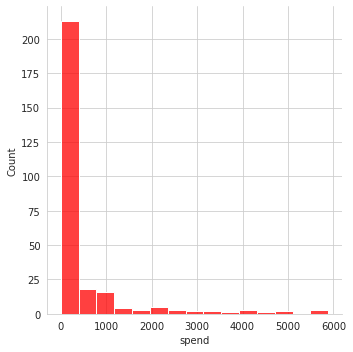

In [302]:
# On x axis - total spend in account is present and on y-axis the count of the 
# number of account that have spend present in that particular range

sns.set_style('whitegrid')
sns.displot(spend_data_wht_outliers['spend'], kde = False, color ='red', bins = 15)
plt.show()

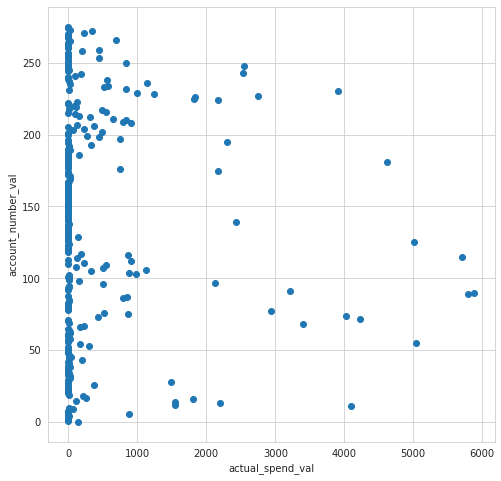

In [323]:
# It shows on x axis is the actual spend val on on y axis is the count of the number of accounts that have the same spend

plt.figure(figsize = (8,8))
plt.scatter(x = spend_data_wht_outliers['spend'],y = range(0,276))
plt.xlabel('actual_spend_val')
plt.ylabel('account_number_val')
plt.show()

### Removing only those accounts having total spend 0

In [304]:
spend_data_wht_0 = spend_data[spend_data['spend'] != 0]

In [305]:
spend_data_wht_0

,account_id,spend
0,5ffdb895b08512986422b08c,22219.80
1,6013fbaaaadf53eb56518f43,140.08
5,613b51d1565006d4e2b60924,7.60
7,61b3133728133e8d9e12b44a,884.40
10,61b8929c7f1731fdf842d921,69.56
...,...,...
277,63c96867b07b5d7a06ab9b53,24.08
278,63ca957c8b417f8566baab8f,687.22
283,63cb891adab9c845ba47c740,230.87
284,63cb9627dab9c845ba47c741,338.67


In [306]:
#Graph
import seaborn as sns

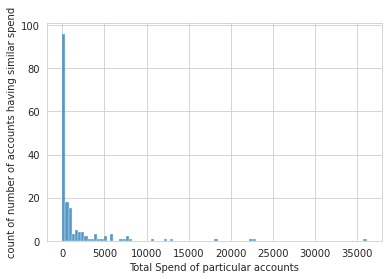

In [307]:
sns.histplot(spend_data_wht_0['spend'])
plt.xlabel("Total Spend of particular accounts")
plt.ylabel("count of number of accounts having similar spend")
plt.show()

In [308]:
total_spend_wht_0 = spend_data_wht_0['spend']
total_spend_wht_0

0      22219.80
1        140.08
5          7.60
7        884.40
10        69.56
         ...   
277       24.08
278      687.22
283      230.87
284      338.67
285       28.27
Name: spend, Length: 171, dtype: float64

In [309]:
Mean=  sum(total_spend_wht_0)/len(total_spend_wht_0)
Mean

1727.5773099415208

In [310]:
# min spend across all acount 
min(total_spend_wht_0)

0.03

In [311]:
# max spend across all acount 
max(total_spend_wht_0)

36143.19

In [312]:
# Account_id having maximum spend
spend_data_wht_0[spend_data_wht_0["spend"]==max(total_spend_wht_0)]['account_id']

105    633444a7d89f609870fcef45
Name: account_id, dtype: object

In [313]:
## Accounts having spend closer to mean

Mean = 1727.5773099415208

greater_than_1250 = spend_data_wht_0[spend_data_wht_0["spend"]>1250]

Between_1250_2500 = greater_than_1250[greater_than_1250["spend"]<2500]
len(Between_1250_2500)

12

In [314]:
# Percentage of accounts lying in the above range

percentage =  len(Between_1250_2500)*100/171
percentage

7.017543859649122

In [317]:
# Median 
sc.median(sorted(total_spend_wht_0))

230.87

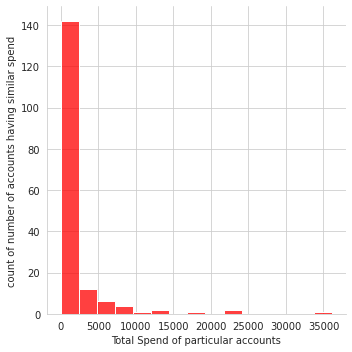

In [318]:
# On x axis - total spend in account is present and on y-axis the count of the 
# number of account that have spend present in that particular range

sns.set_style('whitegrid')
sns.displot(spend_data_wht_0['spend'], kde = False, color ='red', bins = 15)
plt.xlabel("Total Spend of particular accounts")
plt.ylabel("count of number of accounts having similar spend")
plt.show()

In [319]:
spend_data_wht_0.describe()

,spend
count,171.000000
mean,1727.577310
std,4351.258651
min,0.030000
25%,13.470000
50%,230.870000
75%,1060.015000
max,36143.190000


In [320]:
## Accounts having spend closer to median

Median_wth_0 = 230.87

less_than_550 = spend_data_wht_0[spend_data_wht_0["spend"]<550]

Between_550_10 = less_than_550[less_than_550["spend"]>10]
len(Between_550_10)

68

In [322]:
# Percentage of accounts having spend closer to median

percentage = 68*100/171
percentage

39.76608187134503

In [314]:
### CLicks and spend included

In [442]:
account_cost_clicks = []
for i in unique_accounts:
    a = db.report_records.find_one({"record_type":"accounts","campaign_type":"sp","account_id":  i})['cost']
    b = db.report_records.find_one({"record_type":"accounts", "account_id":  i,"campaign_type":"sp"})['clicks']
    c = db.report_records.find_one({"record_type":"accounts", "account_id":  i,"campaign_type":"sp"})['impressions']
    try:
        d = a/b
    except:
        d = "NA"
    try:
        e = b/c
    except:
        e = "NA"
    account_cost_clicks.append([i,a,b,c,d,e])

In [443]:
spend_clicks_data = pd.DataFrame(data = account_cost_clicks,columns =  ["account_id","spend","clicks","impressions","Spend/Click","CTR"])

In [444]:
spend_clicks_data

,account_id,spend,clicks,impressions,Spend/Click,CTR
0,5ffdb895b08512986422b08c,22219.80,2833,662487,7.84321,0.00427631
1,6013fbaaaadf53eb56518f43,140.08,40,5800,3.502,0.00689655
2,60f927c947e4bd8523649c9d,0.00,0,0,NA,NA
3,612e3e3936240d16135f1944,0.00,0,0,NA,NA
4,613b4e3416cb8c3ddcb60925,0.00,0,13,NA,0
...,...,...,...,...,...,...
283,63cb891adab9c845ba47c740,230.87,23,2680,10.0378,0.00858209
284,63cb9627dab9c845ba47c741,338.67,40,24097,8.46675,0.00165996
285,63ce34e69b66eadd5cfdce2e,28.27,26,6149,1.08731,0.00422833
286,63cfc3cf726c7a0b80fdce39,0.00,0,0,NA,NA


In [445]:
### 0_clicks and 0_spends

In [446]:
a = spend_clicks_data.loc[spend_clicks_data["clicks"]== 0]

In [447]:
a[a['spend']>0]

,account_id,spend,clicks,impressions,Spend/Click,CTR


In [448]:
# the above dataframe shows that where the clicks are 0 the spend is also 0

In [449]:
data_without_0_clicks = spend_clicks_data[spend_clicks_data['clicks']>0]

In [450]:
data_without_0_clicks

,account_id,spend,clicks,impressions,Spend/Click,CTR
0,5ffdb895b08512986422b08c,22219.80,2833,662487,7.84321,0.00427631
1,6013fbaaaadf53eb56518f43,140.08,40,5800,3.502,0.00689655
5,613b51d1565006d4e2b60924,7.60,9,7196,0.844444,0.00125069
7,61b3133728133e8d9e12b44a,884.40,78,8617,11.3385,0.00905187
10,61b8929c7f1731fdf842d921,69.56,8,11301,8.695,0.000707902
...,...,...,...,...,...,...
277,63c96867b07b5d7a06ab9b53,24.08,26,4969,0.926154,0.00523244
278,63ca957c8b417f8566baab8f,687.22,24,12565,28.6342,0.00191007
283,63cb891adab9c845ba47c740,230.87,23,2680,10.0378,0.00858209
284,63cb9627dab9c845ba47c741,338.67,40,24097,8.46675,0.00165996
